Determine the horizontal position that the crabs can align to using the least fuel possible. How much fuel must they spend to align to that position?

In [58]:
from statistics import median
from matplotlib import pyplot, colors

final = 1

if not final:
    data = open(r"data0.txt").readlines()
else:
    data = open(r"data1.txt").readlines()

positions = list(map(int,data[0].split(',')))

target = int(median(positions))

total_cost = sum(list(map(lambda p: abs(target - p), positions)))

print(f"Target is {target}, total fuel cost is {total_cost}")

Target is 317, total fuel cost is 331067


Determine the horizontal position that the crabs can align to using the least fuel possible so they can make you an escape route! How much fuel must they spend to align to that position?

458 92881128
Target is 458, total fuel cost is 92881128


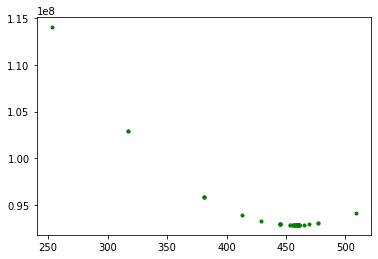

In [59]:


def calc_total_cost(target: int, positions: list) -> int:
    # Uses the formula for calculating triangular numbers
    return int(sum(list(map(lambda p: 0.5*(abs(target - p))*(abs(target - p) + 1), positions))))

target = int(median(positions)) # arbitrary starting point
step = 64 # start big

plot_data_x = []
plot_data_y = []

for v in range(500): # arbitrary count - lets me avoid runaway while loops
    total_cost = calc_total_cost(target, positions)
    total_cost_down = calc_total_cost(target - step, positions)
    total_cost_up = calc_total_cost(target + step, positions)

    plot_data_x.extend([target, target - step, target + step])
    plot_data_y.extend([total_cost, total_cost_down, total_cost_up])

    if total_cost_down < total_cost:
        target = target - step
    elif total_cost_up < total_cost:
        target = target + step
    elif step > 1:
        step = step // 2
    else:
        break
    # print(target, total_cost, step)

print(target, total_cost)

total_cost = int(sum(list(map(lambda p: 0.5*(abs(target - p))*(abs(target - p) + 1), positions))))

print(f"Target is {target}, total fuel cost is {total_cost}")

pyplot.plot(plot_data_x, plot_data_y, 'g.',)